# A Neural Network approach

Import librarys and functions needed for this problem

In [23]:
# Import helper functions from functions.py
import sys
import importlib
sys.path.append('..')
import functions
# reload file to check if there were any updates to file
importlib.reload(functions)
from functions import *

In [143]:
import pandas as pd
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import time

## Load data and augment data
1. load Dataset
2. clean data
3. create train & test data

In [25]:
Path = "C:/Users/Billy/Documents/University/Year 4/Comp/CW2/palmerpenguins_extended.csv"
df_penguin = get_data(Path)
df_penguin = augment_data(df_penguin);
X_train, X_test, y_train, y_test = datasplit_train_test(df_penguin)

c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q2_folder\..\functions.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.island = dataframe_name.island.replace({'Biscoe':0,'Dream':1,'Torgensen':2})
c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q2_folder\..\functions.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.species = dataframe_name.species.replace({'Adelie':0,'Chinstrap':1,'Gentoo':2})
c

## Make data class for nerual network

In [26]:
# Create a class for data as it is needed for pytoch data to train and test the neural network
class Mydata(torch.utils.data.Dataset):
    def __init__(self, X_train, y_train):
        super().__init__()
        # Add the features (X) and the target (y)
        self.X = torch.from_numpy(X_train.values).type(torch.FloatTensor)
        self.y = torch.from_numpy(y_train.values.flatten()).type(torch.LongTensor)
        self.len = self.X.shape[0]

    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

In [27]:
# Using the class and the traing/test data create datasets for neural network

# Create training data 
data_train = Mydata(X_train, y_train)
# create training data loader at batch size 32
train_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=32)
# Create test data 
data_test = Mydata(X_test,y_test)
# Create test data loader with batch size 32
test_loader = torch.utils.data.DataLoader(dataset=data_test, batch_size=32)

## Create Neural Network

In [28]:
# Parameters for layers within the neural network
INPUT_NUM = 9 # Starting number of features
HIDDEN_NUM = 20 # number of nodes within hidden layer
OUTPUT_NUM = 3 # Number of classes to choose between at the end

class MultiClassNet(nn.Module):
    def __init__(self, INPUT_NUM, HIDDEN_NUM, OUTPUT_NUM):
        super().__init__()
        self.lin1 = nn.Linear(INPUT_NUM, HIDDEN_NUM)
        self.lin2 = nn.Linear(HIDDEN_NUM, OUTPUT_NUM)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        x = self.log_softmax(x)
        return x

Training model

In [144]:
# Measuing time it takes to train neural network for comparison
neuralTime0 = time.time()
# Create neual network
model = MultiClassNet(INPUT_NUM=INPUT_NUM, HIDDEN_NUM=HIDDEN_NUM, OUTPUT_NUM=OUTPUT_NUM)

# Choose loss function
criterion = nn.CrossEntropyLoss()
# Choose learning rate
lr = 0.1
# create optimizer for training model
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# Select number of epochs to train model
NUM_EPOCHS = 500
# Create a list to see the loss at each epoch when training model
losses = []
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    for x, y in train_loader:

        # Initialize gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x)

        # Calculate loss
        loss = criterion(y_pred, y)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        epoch_loss += loss.item()

    # Find loss at current epoch
    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)

    # Print epoch number and loss
    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {average_loss:.4f}")
neuralTime1 = time.time()
neuralTime = neuralTime1 - neuralTime0

Epoch 1/500, Loss: 0.9853
Epoch 2/500, Loss: 0.8295
Epoch 3/500, Loss: 0.7250
Epoch 4/500, Loss: 0.6640
Epoch 5/500, Loss: 0.6277
Epoch 6/500, Loss: 0.6038
Epoch 7/500, Loss: 0.5863
Epoch 8/500, Loss: 0.5724
Epoch 9/500, Loss: 0.5605
Epoch 10/500, Loss: 0.5500
Epoch 11/500, Loss: 0.5402
Epoch 12/500, Loss: 0.5309
Epoch 13/500, Loss: 0.5219
Epoch 14/500, Loss: 0.5128
Epoch 15/500, Loss: 0.5036
Epoch 16/500, Loss: 0.4941
Epoch 17/500, Loss: 0.4843
Epoch 18/500, Loss: 0.4742
Epoch 19/500, Loss: 0.4637
Epoch 20/500, Loss: 0.4531
Epoch 21/500, Loss: 0.4424
Epoch 22/500, Loss: 0.4319
Epoch 23/500, Loss: 0.4217
Epoch 24/500, Loss: 0.4119
Epoch 25/500, Loss: 0.4026
Epoch 26/500, Loss: 0.3940
Epoch 27/500, Loss: 0.3860
Epoch 28/500, Loss: 0.3787
Epoch 29/500, Loss: 0.3719
Epoch 30/500, Loss: 0.3658
Epoch 31/500, Loss: 0.3602
Epoch 32/500, Loss: 0.3551
Epoch 33/500, Loss: 0.3504
Epoch 34/500, Loss: 0.3461
Epoch 35/500, Loss: 0.3422
Epoch 36/500, Loss: 0.3386
Epoch 37/500, Loss: 0.3352
Epoch 38/5

Text(0.5, 1.0, 'Epoch vs Loss')

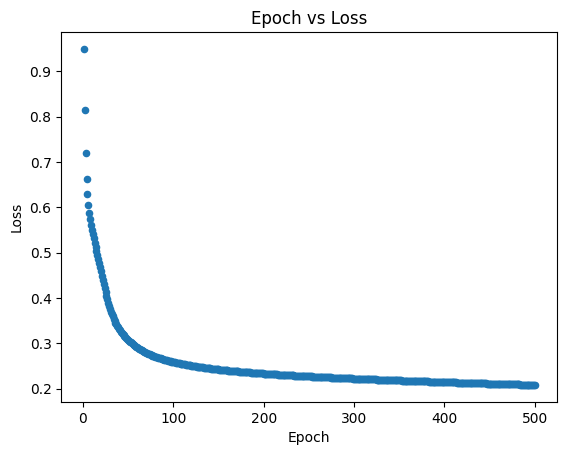

In [48]:
# Plot epoch against loss when training model
epochList = np.linspace(1,500,500)
plt.scatter(epochList,losses,s=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')

# From the graph you can see that it starts to level off 
# This meaning that adding more epochs when training will get deminishing returns

In [49]:
PATH = './cifar_net.pth' #change maybe
torch.save(model.state_dict(), PATH)

## Testing accuracy of Neural Network

In [112]:
# prepare to count predictions for each class
classes = [0,1,2]
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# list of accuacy for each class to plot against non neural network approach
neural_class = []

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        features, labels = data
        outputs = model(features)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    neural_class.append(accuracy)
    print(f'Accuracy for class: {classname:.0f} is {accuracy:.1f} %')

Accuracy for class: 0 is 89.4 %
Accuracy for class: 1 is 76.2 %
Accuracy for class: 2 is 96.5 %


In [63]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        features, labels = data
        # calculate outputs by running features through the network
        outputs = model(features)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of model on whole test set: {100 * correct // total} %')

Accuracy of model on whole test set: 89 %


## Comparing neural network and non neural network approach

In [ ]:
# Getting the accuracy for each class using the Decision tree from Q1
DecisionTree_reduced = DecisionTreeClassifier(max_depth=9)
TreeTime0 = time.time()
DecisionTree_reduced = DecisionTree_reduced.fit(X_train,y_train)
TreeTime1 = time.time()
TreeTime = TreeTime1 - TreeTime0
test_accuracy = DecisionTree_reduced.score(X_test, y_test)

# Additional list for accuracy of each class
non_class = []

for i in range(3):
    Xtest_class = X_test[y_test['species'] == i]
    data_len = len(Xtest_class)
    ytest_class = pd.DataFrame([i]*data_len,columns=y_test.columns)
    reducedAccuracy = DecisionTree_reduced.score(Xtest_class,ytest_class)
    non_class.append(reducedAccuracy*100)

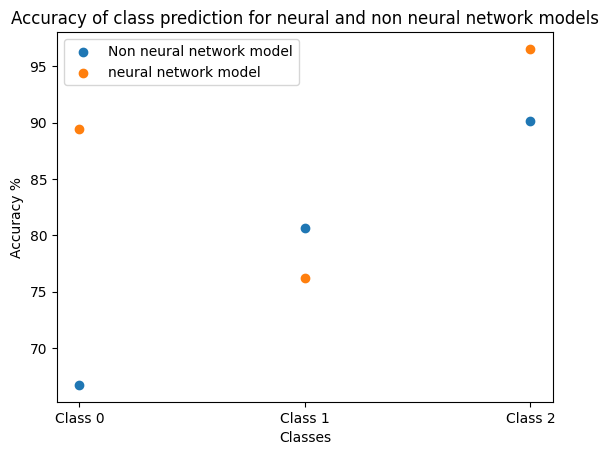

In [ ]:
# Plot the accuacy for the 3 classes from both models
plt.Figure()
plt.scatter(classes,non_class,label="Non neural network model")
plt.scatter(classes,neural_class,label="neural network model")
plt.xticks([0,1,2],['Class 0','Class 1', 'Class 2'])
plt.xlabel('Classes')
plt.ylabel('Accuracy %')
plt.title('Accuracy of class prediction for neural and non neural network models')
plt.legend()

From comparing the 2 models you can see that the neural network has an average accuaracy higher than the decision tree.<br>
However you also have to consider the time it takes to train both models

Neural Network model: 41.21 seconds
Decision tree model: 0.11 seconds


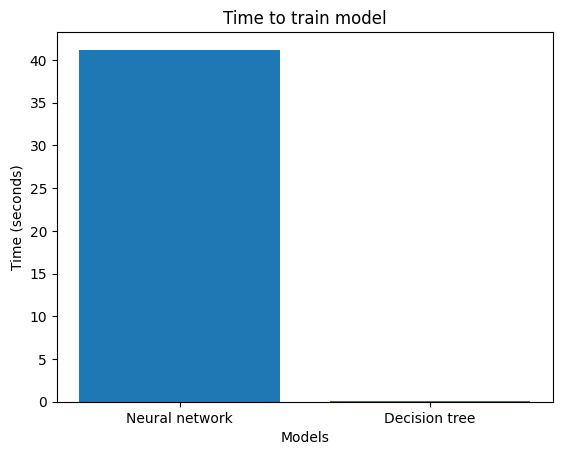

In [164]:
# Compare the time it took too train the 2 models using the time measured previously.
# You can see that there is a big different between them. However the time to train the neural network could be reduced.
# In question it will look into how epoch can affect the neural network. 

# Plot both times
plt.bar(['Neural network','Decision tree'],[neuralTime,TreeTime])
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.title('Time to train model');
# Print times for both models for easier comparison
print(f"Neural Network model: {neuralTime:.2f} seconds")
print(f"Decision tree model: {TreeTime:.2f} seconds")